In [12]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [13]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [14]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [15]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [16]:
# Declare a Base using `automap_base()`
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

In [17]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [18]:
# Assign the measurement class to a variable called `Measurement` and
Measurement = Base.classes.measurement

# assign the station class to a variable called `Station`
Station = Base.classes.station

In [19]:
# Create a session
session = Session(engine)

# Exploratory Precipitation Analysis

In [20]:
# Find the most recent date in the data set.
most_recent = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent

('2017-08-23',)

In [21]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.

# Calculate the date one year from the last date in data set.
one_year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)
one_year_ago

datetime.date(2016, 8, 23)

In [22]:
# Perform a query to retrieve the data and precipitation scores
query = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date.between('2016-08-23', '2017-08-23')).all()

query

[('2016-08-23', 0.0),
 ('2016-08-24', 2.0),
 ('2016-08-25', 2.0),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.3),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 3.3),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.8),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 1.3),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.8),
 ('2016-09-10', 0.0),
 ('2016-09-11', 1.3),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.5),
 ('2016-09-14', 33.5),
 ('2016-09-15', 10.7),
 ('2016-09-16', 1.5),
 ('2016-09-17', 1.3),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.5),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 1.5),
 ('2016-09-27', 0.5),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('201

In [23]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(query, columns=['date','precipitation'])
df.set_index('date', inplace=True)
df.head()


,precipitation
date,
2016-08-23,0.0
2016-08-24,2.0
2016-08-25,2.0
2016-08-26,0.0
2016-08-27,0.0


In [24]:
# Sort the dataframe by date
df.sort_values(by='date', inplace=True)
df

,precipitation
date,
2016-08-23,0.0
2016-08-23,NaN
2016-08-23,45.5
2016-08-23,1.3
2016-08-23,3.8
...,...
2017-08-22,0.0
2017-08-23,0.0
2017-08-23,0.0


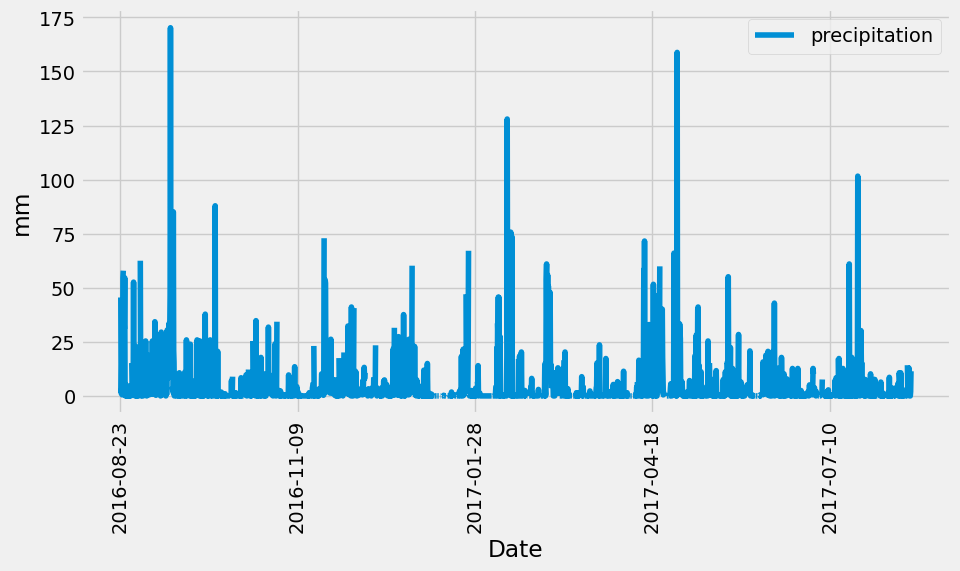

In [25]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot(rot=90, xlabel="Date", ylabel="mm", figsize=(10,5))
plt.show()

In [26]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [27]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(Station).distinct().count()
print(station_count)

9


In [28]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station,func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [29]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_stats = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()
station_stats


[(12.2, 29.4, 22.03582251082252)]

In [30]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
query_station = session.query(Measurement.tobs).\
    filter(Measurement.date.between('2016-08-23', '2017-08-23')).\
    filter(Measurement.station == 'USC00519281').all()

query_station

[(25.0,),
 (25.0,),
 (26.7,),
 (26.7,),
 (23.9,),
 (22.8,),
 (25.6,),
 (25.0,),
 (25.6,),
 (26.7,),
 (26.7,),
 (25.6,),
 (25.6,),
 (25.6,),
 (22.8,),
 (23.3,),
 (26.7,),
 (26.1,),
 (25.0,),
 (26.7,),
 (24.4,),
 (26.1,),
 (23.9,),
 (26.1,),
 (25.6,),
 (26.1,),
 (25.6,),
 (25.6,),
 (24.4,),
 (23.3,),
 (25.0,),
 (25.6,),
 (26.1,),
 (26.1,),
 (25.0,),
 (26.7,),
 (25.6,),
 (25.6,),
 (25.6,),
 (25.0,),
 (26.1,),
 (26.1,),
 (26.1,),
 (26.1,),
 (23.9,),
 (24.4,),
 (22.8,),
 (22.2,),
 (21.7,),
 (25.0,),
 (26.1,),
 (25.6,),
 (26.1,),
 (25.0,),
 (26.1,),
 (25.0,),
 (25.6,),
 (25.6,),
 (25.6,),
 (25.6,),
 (25.0,),
 (23.3,),
 (23.9,),
 (24.4,),
 (22.8,),
 (24.4,),
 (23.3,),
 (25.0,),
 (24.4,),
 (24.4,),
 (23.3,),
 (23.9,),
 (23.9,),
 (23.9,),
 (23.9,),
 (21.7,),
 (17.2,),
 (21.1,),
 (20.0,),
 (19.4,),
 (25.0,),
 (23.3,),
 (25.0,),
 (24.4,),
 (24.4,),
 (23.9,),
 (24.4,),
 (23.9,),
 (22.8,),
 (23.9,),
 (22.8,),
 (23.9,),
 (23.3,),
 (23.9,),
 (23.3,),
 (23.9,),
 (22.8,),
 (23.9,),
 (22.8,),
 (22.8,),


In [31]:
#data into a dataframe
df_tob = pd.DataFrame(query_station, columns=['tobs'])
df_tob.head()

,tobs
0,25.0
1,25.0
2,26.7
3,26.7
4,23.9


<Axes: xlabel='Temperature', ylabel='Frequency'>

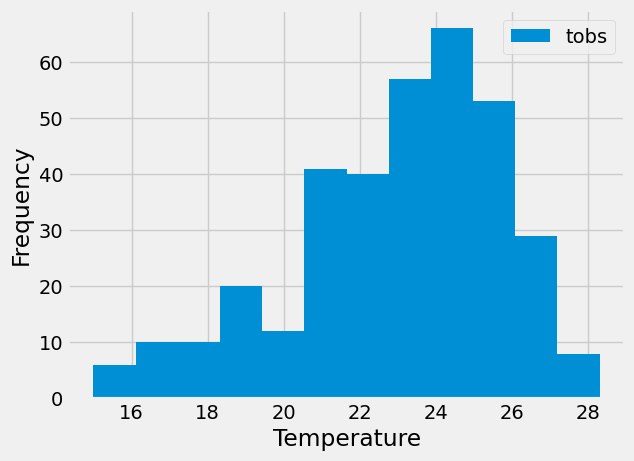

In [32]:
#Histogram
df_tob.plot.hist(bins=12, xlabel="Temperature", ylabel="Frequency")


# Close Session

In [33]:
# Close Session
session.close()
